In [64]:
import pandas as pd
import scipy.stats as stats
import numpy as np

file_name = 'processing_ready_data.xlsx'
df = pd.read_excel(io=file_name)

df_no_outliers = df[df.weekly_minutes < 500]

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Extreme score')

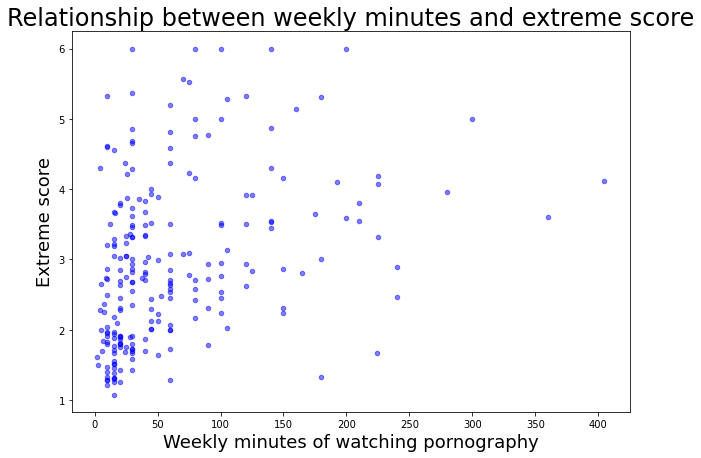

In [65]:
import matplotlib.pyplot as plt

ax1 = df_no_outliers.plot(kind='scatter', x='weekly_minutes', y='extreme_score', color='blue', alpha=0.5, figsize=(10, 7))
plt.title('Relationship between weekly minutes and extreme score', size=24)
plt.xlabel('Weekly minutes of watching pornography', size=18)
plt.ylabel('Extreme score', size=18)

In [66]:
# MULTIPLE LINEAR REGRESSION - WEEKLY MINUTES AND EXTREME SCORE TO PREDICT SEXUAL LIFE

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(df_no_outliers[['weekly_minutes', 'extreme_score']], df_no_outliers['sexual_life'])

print(f'Intercept: {round(mlr.intercept_, 4)}')
mlr_coefs = [round(coef, 4) for coef in mlr.coef_]
print(f'Coef weekly minutes: {mlr_coefs[0]}, coef extreme score: {mlr_coefs[1]}')

Intercept: 5.5452
Coef weekly minutes: -0.0055, coef extreme score: 0.0718


In [79]:
# LINEAR REGRESSION - EXTREME SCORE TO PREDICT WEEKLY MINUTES

slope, intercept, r, p, std_err = stats.linregress(df_no_outliers['extreme_score'], df_no_outliers['weekly_minutes'])
print(f'Intercept: {round(intercept, 2)}, slope: {round(slope, 2)}, r: {round(r, 2)} p: {round(p, 10)}')

design_matrix = np.asarray([[1, value] for value in df_no_outliers['extreme_score']])
beta = np.asarray([intercept, slope])

predicted_values = design_matrix @ beta

Intercept: 3.08, slope: 20.06, r: 0.35 p: 3.5e-08


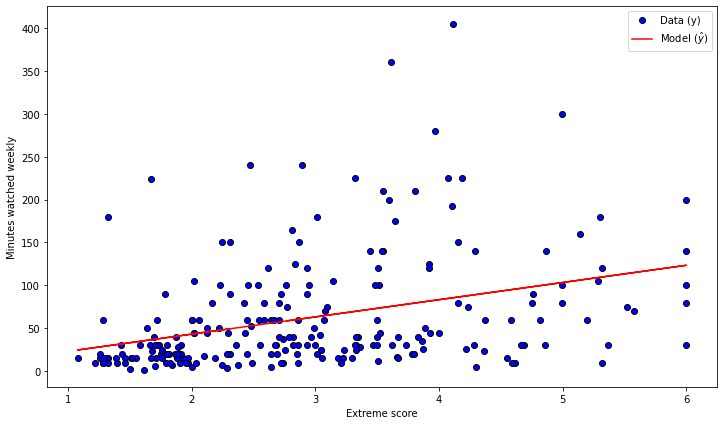

In [68]:

plt.plot(df_no_outliers['extreme_score'], df_no_outliers['weekly_minutes'], 'ko', markerfacecolor='b')
plt.plot(df_no_outliers['extreme_score'], predicted_values, '-', color='r')
plt.legend(('Data (y)','Model ($\^{y}$)'))

plt.xlabel('Extreme score')
plt.ylabel('Minutes watched weekly')
plt.show()

In [69]:
# LINEAR REGRESSION - WEEKLY MINUTES TO PREDICT EXTREME SCORE

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(df_no_outliers[['weekly_minutes']], df_no_outliers['extreme_score'])

print(f'Intercept: {round(lr.intercept_, 4)}')
print(f'Coef: {round(lr.coef_[0], 4)}')

Intercept: 2.5538
Coef: 0.0062


In [70]:
# MULTIPLE LINEAR REGRESSION - WEEKLY MINUTES AND EXTREME SCORE TO PREDICT PPCS

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(df_no_outliers[['weekly_minutes', 'extreme_score']], df_no_outliers['PPCS_score'])


print(f'Intercept: {round(mlr.intercept_, 4)}')
mlr_coefs = [round(coef, 4) for coef in mlr.coef_]
print(f'Coef weekly minutes: {mlr_coefs[0]}, coef extreme score: {mlr_coefs[1]}')

Intercept: 6.8737
Coef weekly minutes: 0.051, coef extreme score: 1.927
